In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
# Load your data
data = np.genfromtxt('data2.csv', delimiter=',')
N, d = data.shape

In [90]:
from scipy.stats import multivariate_normal
# k = 
k=2
# pi : (k, 1)
pi = np.ones(k) / k
# gamma : (N, k)
gamma = np.zeros((N, k))
for n in range(N):
    gamma[n] = pi
# means : (k, d) 
means = np.random.rand(k, d)
# cov : (k, d, d)
cov = np.array([np.eye(d)] * k)

log_likelihood = 0

imeans = np.array(means, copy=True) 
icov = np.array(cov, copy=True) 

In [91]:
tol = 1e-3
num_iterations = 1000
for i in range(num_iterations):
    # E step
    for n in range(N):
            likelihood = np.array([pi[j] * multivariate_normal(means[j], cov[j]).pdf(data[n]) for j in range(k)])
            gamma[n] = likelihood / np.sum(likelihood)
     

    # M step
    Nk = np.sum(gamma, axis=0)
    for j in range(k):
        means[j] = np.sum(gamma[:,j,None] * data, axis=0) / Nk[j]
        cov[j] = np.dot((gamma[:,j,None] * (data - means[j])).T, (data - means[j])) / Nk[j]
        pi[j] = Nk[j] / N
            
    
    log_likelihood = np.sum(np.log(np.sum(likelihood, axis=0)))
    if i > 0 and np.abs(log_likelihood - prev_log_likelihood) < tol:
        break
    prev_log_likelihood = log_likelihood

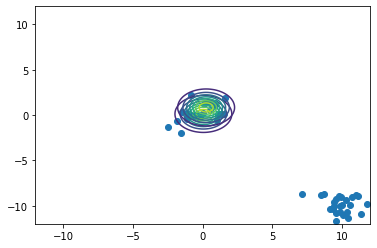

In [92]:
# Initial Gaussian distribution

N    = 200
X    = np.linspace(-12, 12, N)
Y    = np.linspace(-12, 12, N)
X, Y = np.meshgrid(X, Y)
pos  = np.dstack((X, Y))
plt.figure()
for i in range(k):
    rv   = multivariate_normal(imeans[i], icov[i])
    Z    = rv.pdf(pos)
    plt.contour(X, Y, Z)

plt.scatter(data[:, 0], data[:, 1])
plt.show()

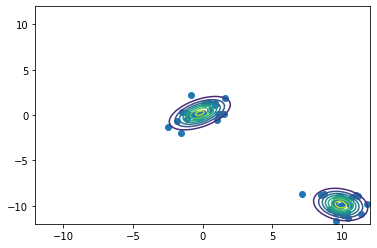

In [93]:
# Final Gaussian distribution

N    = 200
X    = np.linspace(-12, 12, N)
Y    = np.linspace(-12, 12, N)
X, Y = np.meshgrid(X, Y)
pos  = np.dstack((X, Y))
plt.figure()
for i in range(k):
    rv   = multivariate_normal(means[i], cov[i])
    Z    = rv.pdf(pos)
    plt.contour(X, Y, Z)

plt.scatter(data[:, 0], data[:, 1])
plt.show()

We can oberserve form the final gaussian distribution graph that the algorithm has converged and the both the clusters fit the data quite well.

In [94]:
# Final log Likelihood Value
print(log_likelihood)

-2.407391621839702
